In [456]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### Data Preparation

In [457]:
df_pops = pd.read_pickle('./populations.pkl')
df_pops

,NGA,Pop_Min,Pop_Max,From_Year,To_Year
Polity,,,,,
MxAztec,Basin of Mexico,3000000.0,4000000,0,0
MxPostM,Basin of Mexico,700000.0,800000,0,0
MxToltc,Basin of Mexico,150000.0,200000,0,0
USKameh,Big Island Hawaii,60000.0,180000,1800,0
Hawaii2,Big Island Hawaii,3500.0,7000,1200,0
...,...,...,...,...,...
MxAlb3B,Valley of Oaxaca,7245.0,9660,0,0
MxAlb5*,Valley of Oaxaca,8127.0,10836,0,0
YeHmyr1,Yemeni Coastal Plain,300000.0,500000,0,0


Max values for populaiton estimates and 'to_year' are removed for simplicity and because most of them are not specified anyway.

In [458]:
df_china = df_pops[df_pops['NGA']=='Middle Yellow River Valley'].sort_values('From_Year')
df_china.drop(['To_Year', 'Pop_Max', 'NGA'], axis=1, inplace=True)
df_china.rename({'Pop_Min': 'Population', 'From_Year': 'Year'}, axis=1, inplace=True)
df_china

,Population,Year
Polity,,
CnWZhou,9000000.0,-1045
CnWZhou,13500000.0,-956
CnErJin,16163863.0,-300
CnWHan*,45000000.0,-200
CnErlig,2000000.0,0
CnErlit,54000.0,0
CnNSong,60000000.0,0
CnYngsh,10000.0,0
CnShang,5000000.0,0


<AxesSubplot:title={'center':'Population of Middle Yellow River Valley Through History'}, xlabel='Year', ylabel='Population'>

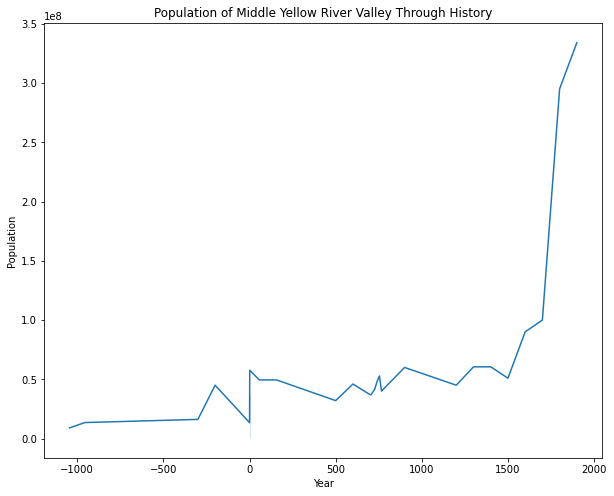

In [459]:
plt.figure(figsize=(10, 8))
plt.title('Population of Middle Yellow River Valley Through History')
sns.lineplot(data=df_china, x='Year', y='Population')

<AxesSubplot:ylabel='Frequency'>

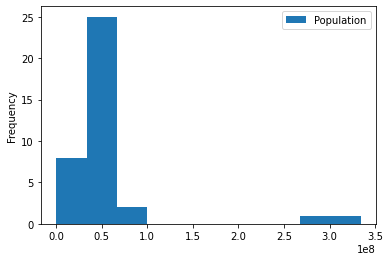

In [460]:
df_china.plot.hist(x='Year')

<AxesSubplot:ylabel='Density'>

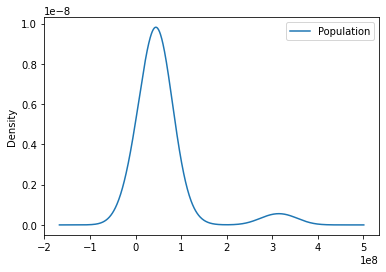

In [461]:
df_china.plot.kde(x='Year')

In [462]:
X=df_china[['Year']]
y=df_china['Population']

### Modelling

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [464]:
regr=ElasticNetCV(cv=5)
yhat = regr.fit(X_train, y_train).predict(X)

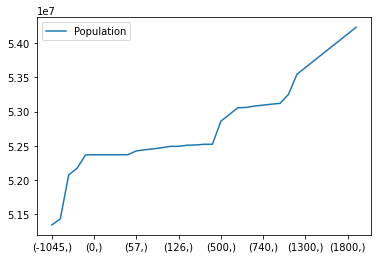

In [465]:
df_plot=pd.DataFrame(yhat, index=X, columns=['Population']).plot()

In [466]:
pipe=make_pipeline(PolynomialFeatures(degree=8), LinearRegression()).fit(X_train, y_train)

In [467]:
yhat=pipe.predict(X)

<AxesSubplot:xlabel='Year'>

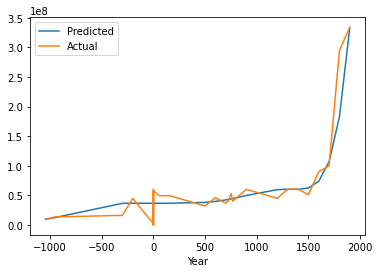

In [468]:
pd.DataFrame({'Predicted': yhat, 'Actual': y, 'Year': X['Year']}).plot(x='Year')

In [492]:
pred=pipe.predict([[2020]])
print(int(pred/1000000))

683


In [489]:
print(int(334000000/1000000))

334
